# Table of Contents
* [Introduction](#Introduction)
* [Code](#Code)
    * [Stable Condition](#Stable Condition)
    * [Chaos!](#Chaos!)
* [References](#References)

# Introduction

In this project, we will explore the chaotic nature of Lorenz Attractors. This system is a classic example of a chaotic system and was one of the first examples of chaotic systems that was studied. 

These equations were developed by Edward Lorenz to study atmospheric convection.



Now we'll define our ODE as well as our differential equation solvers. Lorenz wanted to describe various properties of a two dimensional fluid through time as it was heated from below and cooled from above. The Lorenz equations solve three different variables through time:

$$ \frac{dx}{dt} = \sigma \times (y-x)$$

$$ \frac{dy}{dt} = (\rho \times x) - y - (x\times y)$$

$$ \frac{dz}{dt} = (x\times y) - (b\times z)$$

Here $x$ describes the rate of convection, $y$ is horizontal temperature variation, and $z$ is the vertical temperature variation. The constants are different fluid constants. $\sigma$ is the Pradntl number which describes the ratio of momentum diffusivity to thermal diffusivity. $\rho$ is the Rayleigh number which describes buoyancy driven flow in a fluid. This number determines whether heat is transfered through conduction or convection. $b$ describes some dimension of the system

# Code

To start studying the system, lets import the necessary packages. We'll use numpy as usual, as well as matplotlib. But this time we're also going to specifically import a 3d plotter from matplotlib called Axes3D.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

%matplotlib inline

In our code, we'll define our function to take a vector and some time input. The time never gets used, but it lets the differential equation solvers be general.

We take in a vector of our variables and return the derivative of that. The differential solver will allow us to solve for the next value of the system at time $t+h$

In [1]:
def lorenz(vec, t):
    x = vec[0]
    y = vec[1]
    z = vec[2]
    
    dvecdt = np.zeros(3)
    
    dvecdt[0] = sigma*(y - x)   # xdot
    dvecdt[1] = r*x - y - x*z   # ydot
    dvecdt[2] = x*y - b*z       # zdot
    return dvecdt

def RK4(diffeq, y0, t, h):
    k1 = h*diffeq(y0, t)                    # dy/dt at t
    k2 = h*diffeq(y0+0.5*k1, t + h/2.)      # dy/dt at t+h/2
    k3 = h*diffeq(y0+0.5*k2, t + h/2.)      # dy/dt at t+h/2
    k4 = h*diffeq(y0+k3, t + h)             # dy/dt at t+h
    return y0 + (k1+k4)/6.0 + (k2+k3)/3.0

Now we'll define our starting conditions. This includes our starting constants of $\sigma$, $\rho$, and $b$ as well as our starting values of x, y, and z. Of course we'll also start at time $t=0$ and we'll also define our time step $h$.



## Stable Condition

The lorenz attractor is stable for some starting conditions, and chaotic for others. Let's start with a stable case to get an idea of what the system can look like. 



In [3]:
sigma = 10   # Pradntl number 
r = 5        # scaled Rayleigh number
b = 8/3      # scaled dimension of the system
x0 = 0
y0 = 1
z0 = 1
t = 0        # start time
h = 0.01       # time step

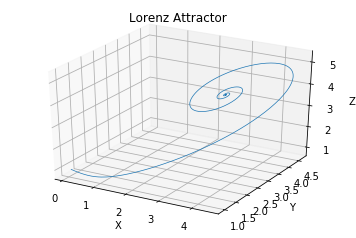

In [4]:
sim_time = 100  # time the simulation will run
t=0
x, y, z = [], [], [] # Setting initial values
vec = np.zeros(3)
vec[0] = x0
vec[1] = y0
vec[2] = z0
while t < sim_time: 
    vec1 = RK4(lorenz,vec,t,h)
    x.append(vec1[0])
    y.append(vec1[1])
    z.append(vec1[2])
    vec = vec1
    t=t+h
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot(x, y, z, lw=0.7, label = '')
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
ax.set_title("Lorenz Attractor")
plt.show()

## Chaos!

The lorenz system gets interesting when we play around with the value of $\rho$. As the value of $\rho$ increases, two attractors appear and the system begins to 'dance' chaotically between the two attractors.

In [5]:
sigma = 10   # Pradntl number 
r = 28       # scaled Rayleigh number
b = 8/3      # scaled dimension of the system
x0 = 0
y0 = 1
z0 = 1
t = 0        # start time
h = 0.01       # time step

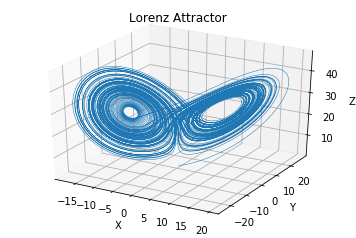

In [7]:
sim_time = 100  # time the simulation will run
t=0
x, y, z = [], [], [] # Setting initial values
vec = np.zeros(3)
vec[0] = x0
vec[1] = y0
vec[2] = z0
while t < sim_time: 
    vec1 = RK4(lorenz,vec,t,h)
    x.append(vec1[0])
    y.append(vec1[1])
    z.append(vec1[2])
    vec = vec1
    t=t+h
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot(x, y, z, lw=0.5, label = '')
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
ax.set_title("Lorenz Attractor")
plt.show()

Under these intial conditions, the system oscilliates between two different 'attractors'. The system never settles into an equilibrium, and the final outcome of the system is impossible to determine analytically and is extremely sensitive to inital conditions of $x$, $y$, and $z$ as well as the constants $\sigma, \rho$ and $b$.

# References

https://en.wikipedia.org/wiki/Lorenz_system

http://mathworld.wolfram.com/LorenzAttractor.html
    
https://matplotlib.org/examples/mplot3d/lorenz_attractor.html